In [3]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Importing CSV file and Inspecting the data

In [4]:
#Importing the CSV file
number = pd.read_csv('C:/Users/divij/Downloads/train (3).csv')
number.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
number.shape

(42000, 785)

In [6]:
number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
print(number.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


## Exploring the data

In [8]:
#Creating a list of all the numericals
order = list(np.sort(number['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


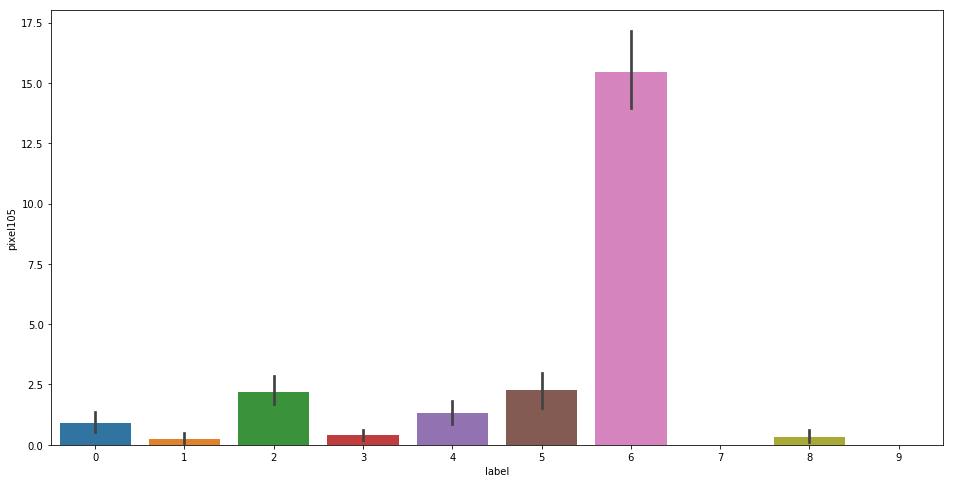

In [9]:
#Checking how one attribute varies with the numericals

plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='pixel105', 
            data=number, 
            order=order)

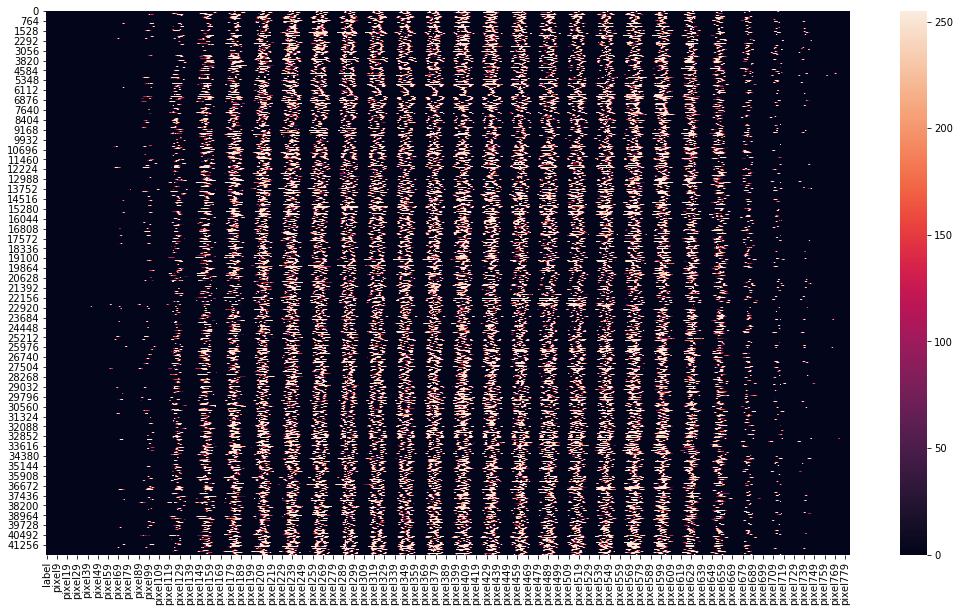

In [10]:
#Heatmap to check corellation
plt.figure(figsize=(18, 10))
sns.heatmap(number)

## Model Building

In [11]:
# splitting into X and y
X = number.drop("label", axis = 1)
y = number['label']

In [12]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,train_size=0.2, test_size = 0.8, random_state = 101)

In [13]:
X_train.shape

(8400, 784)

In [14]:
X_test.shape

(33600, 784)

**We have taken 20% of the data to build the model**

In [15]:
# Trying a linear model first using SVC

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predicting
y_pred = model_linear.predict(X_test)

In [16]:
#printing confusion matrix and accuracy

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


**Accuracy is low with just 91%. Let's try a non linear model for this dataset**

In [17]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [18]:
# printing confusion matrix and accuracy

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9396428571428571 

[[3195    0   19    5    4   11   32    4   14    1]
 [   0 3689   23   12    8    3    7    6    8    4]
 [  15   15 3144   29   31    5   18   37   43    6]
 [   5    8   92 3191    5   73    6   31   43   21]
 [   3    7   57    1 3099    9   19   21    7   67]
 [  15   10   37   66   16 2776   53   15   32   19]
 [  19    5   46    1   12   31 3149    2   12    0]
 [   6   21   66   11   25    3    0 3285    3   84]
 [  14   24   40   63   14   62   22   19 2996   18]
 [  12   10   38   40   80    6    0   97   24 3048]]


**Accuracy has improved to almost 94%. Let's see if we can further improve it by cross validation and grid search**

In [19]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specifying range of hyperparameters
hyper_params = [ {'gamma': [0.0005, 0.0007, 0.0009],
                     'C': [1, 10, 100, 1000]}]


# model
model = SVC(kernel="rbf")

# GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
model_cv.fit(X_train, y_train)              

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 11.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.0005, 0.0007, 0.0009], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [20]:
# printing cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,41.855084,0.337484,12.980496,0.503815,1,0.0005,"{'C': 1, 'gamma': 0.0005}",0.932143,0.922619,0.930952,...,0.925714,0.004929,12,0.952232,0.955208,0.955060,0.954167,0.956399,0.954613,0.001386
1,42.967524,1.055864,13.084817,1.153766,1,0.0007,"{'C': 1, 'gamma': 0.0007}",0.932738,0.926190,0.936310,...,0.929286,0.004571,11,0.961161,0.964286,0.961310,0.962946,0.964583,0.962857,0.001435
2,46.650279,1.633002,12.783822,0.323488,1,0.0009,"{'C': 1, 'gamma': 0.0009}",0.935119,0.927381,0.935714,...,0.930357,0.004908,10,0.969048,0.968601,0.968006,0.969792,0.970238,0.969137,0.000802
3,30.107906,1.391007,9.904718,0.294487,10,0.0005,"{'C': 10, 'gamma': 0.0005}",0.936310,0.938095,0.941071,...,0.937381,0.002176,7,0.993006,0.993452,0.993750,0.993304,0.993304,0.993363,0.000242
4,33.305158,0.543155,10.430513,0.129800,10,0.0007,"{'C': 10, 'gamma': 0.0007}",0.936310,0.939881,0.943452,...,0.937738,0.003463,4,0.996726,0.997024,0.997024,0.997173,0.997173,0.997024,0.000163
5,36.430800,0.590826,11.053050,0.255147,10,0.0009,"{'C': 10, 'gamma': 0.0009}",0.939286,0.938095,0.945833,...,0.939524,0.003252,1,0.999107,0.999554,0.999107,0.998958,0.998958,0.999137,0.000219
6,30.215617,0.536394,10.098202,1.077554,100,0.0005,"{'C': 100, 'gamma': 0.0005}",0.933333,0.933929,0.942857,...,0.934286,0.004496,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,36.774881,3.289570,11.359829,1.429421,100,0.0007,"{'C': 100, 'gamma': 0.0007}",0.934524,0.932738,0.946429,...,0.937500,0.004792,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,36.822952,1.298686,11.096533,0.162002,100,0.0009,"{'C': 100, 'gamma': 0.0009}",0.938095,0.935119,0.947024,...,0.938810,0.004232,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,31.313282,2.035878,9.966953,0.865770,1000,0.0005,"{'C': 1000, 'gamma': 0.0005}",0.933333,0.933929,0.942857,...,0.934286,0.004496,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


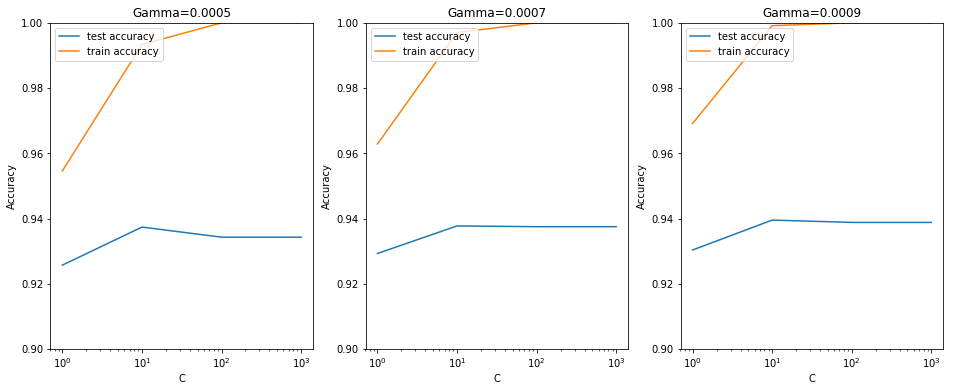

In [21]:
# Plotting a graph to check hyperparameters

cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_0005 = cv_results[cv_results['param_gamma']==0.0005]

plt.plot(gamma_0005["param_C"], gamma_0005["mean_test_score"])
plt.plot(gamma_0005["param_C"], gamma_0005["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0005")
plt.ylim([0.90, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_0007 = cv_results[cv_results['param_gamma']==0.0007]

plt.plot(gamma_0007["param_C"], gamma_0007["mean_test_score"])
plt.plot(gamma_0007["param_C"], gamma_0007["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0007")
plt.ylim([0.90, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0009 = cv_results[cv_results['param_gamma']==0.0009]

plt.plot(gamma_0009["param_C"], gamma_0009["mean_test_score"])
plt.plot(gamma_0009["param_C"], gamma_0009["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0009")
plt.ylim([0.90, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [22]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9395238095238095 corresponding to hyperparameters {'C': 10, 'gamma': 0.0009}


In [23]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.0009, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9476785714285715 

[[3212    0   17    3    3   10   26    3    9    2]
 [   0 3691   25    8    5    4    5   11    7    4]
 [  15   13 3165   29   31    4   19   39   20    8]
 [   5    5   72 3230    4   79    1   30   31   18]
 [   5   10   40    1 3113    5   21   20    9   66]
 [  15    9   31   62   15 2815   34   13   31   14]
 [  18    6   41    1   13   19 3168    2    9    0]
 [   4   17   44   11   35    5    1 3323    4   60]
 [   8   17   41   55   14   51   18   14 3044   10]
 [   9    9   30   20   82    9    0   91   24 3081]] 



**Accuracy has improved to 94.7% or 95% by using the optimal hyperparameters. We will proceed with this model**

In [31]:
#Creating a dataframe of the predictions
y_pred_test_df = pd.DataFrame({'label':y_test.values,'Predicted_Label':y_pred})
y_pred_test_df

,label,Predicted_Label
0,1,1
1,3,3
2,0,0
3,0,0
4,1,1
5,9,9
6,1,1
7,5,5
8,0,0
9,6,6


In [24]:
from sklearn.metrics import precision_score, recall_score

# Printing precision score and recall score
print("Precision =",precision_score(y_test, y_pred, average=None), "\n")
print("Recall =", recall_score(y_test, y_pred, average=None))

Precision = [0.97599514 0.97723061 0.90273816 0.94444444 0.93906486 0.93802066
 0.96204069 0.93711224 0.95483061 0.94422311] 

Recall = [0.97777778 0.98164894 0.94675441 0.9294964  0.94620061 0.92629154
 0.96673787 0.94834475 0.93031785 0.91833085]


## Making predictions on the test csv (Kaggle)

In [25]:
#Importing the test CSV file
number_test = pd.read_csv('C:/Users/divij/Downloads/test.csv')
number_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# scaling the features
X_test_1_scaled = scale(number_test)

In [27]:
# Predicting by using the selected model
y_pred_test_1 = model.predict(X_test_1_scaled)

In [28]:
y_pred_test_1[:10]

array([2, 0, 9, 4, 3, 7, 0, 3, 0, 3], dtype=int64)

In [29]:
#Creating a dataframe of the predictions
y_pred_test_1_df = pd.DataFrame({'Label':y_pred_test_1})
y_pred_test_1_df

,Label
0,2
1,0
2,9
3,4
4,3
5,7
6,0
7,3
8,0
9,3


In [32]:
# Exporting the uber df into a csv file
from IPython.display import FileLink, FileLinks
y_pred_test_1_df.to_csv("C:/Users/divij/Downloads/kaggle_digit_recogniser.csv", sep=',', index = False)